In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing

import urllib
from math import sqrt
from sklearn import tree
import pylab as pl
import pandas as pd
import StringIO
#from pydot import graph_from_dot_data as gdot
from sklearn.externals.six import StringIO 

A lasso regression analysis was performed to identify the most relevant factors to predict the cancer type of the patients in the WDBC database. We can compare also with the results obtained using random forest on the same dataset.

In [121]:
# URL for the Wisconsin Diagnostic Breast Cancer (WDBC) (UCI Machine Learning Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
# download the file
raw_data = urllib.urlopen(url)
# load the file as a numpy matrix
attributes = ['id','cancer_type','mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
bcd =  np.genfromtxt(raw_data, delimiter=',', dtype=None, names= attributes)

In [122]:
# Convert the numpy array into Pandas DataFrame
bcdf = pd.DataFrame(data=bcd, columns=attributes)

In [123]:
#Clean the datasets
data_clean = bcdf.dropna()

In [124]:
#Data managment
recode1 = {"M":1, "B":0}
data_clean['cancer_type']= data_clean['cancer_type'].map(recode1)

In [138]:
#Select predictor variables and target variable as separate data sets
predvar = data_clean[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']]
target = data_clean.cancer_type

In [126]:
predictors=predvar.copy()

In [128]:
#Lambda function that standardize predictors to have mean=0 and std=1
#predictors_new =  map(lambda w: preprocessing.scale(predictors[w].astype('float64')), predictors.columns)

In [129]:
#Standardize predictors to have mean=0 and std=1
for l in predictors.columns:
    predictors[l]=preprocessing.scale(predictors[l].astype('float64'))

In [131]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target,
                                                              test_size=.3, random_state=123)

In [132]:
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

E:\Programs\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 41 iterations, alpha=5.997e-05, previous alpha=1.402e-05, with an active set of 26 regressors.
  ConvergenceWarning)
E:\Programs\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 45 iterations, alpha=3.677e-04, previous alpha=1.093e-05, with an active set of 28 regressors.
  ConvergenceWarning)
E:\Programs\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 45 iterations, alpha=1.481e-03, previous alpha=5.634e-06, with an active set of 28 regressors.
  ConvergenceWarn

In [133]:
# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'area_error': -0.14788698323445656,
 'compactness_error': -0.036684572404633964,
 'concave_points_error': 0.024168121102955999,
 'concavity_error': -0.039841808790681277,
 'fractal_dimension_error': 0.0,
 'mean_area': 0.0,
 'mean_compactness': -0.029388638617078373,
 'mean_concave_points': 0.028080148318659834,
 'mean_concavity': 0.0,
 'mean_fractal_dimension': -0.034092993084696127,
 'mean_perimeter': 0.0,
 'mean_radius': 0.093785303277274745,
 'mean_smoothness': 0.0,
 'mean_symmetry': 0.0,
 'mean_texture': 0.022637126827911986,
 'perimeter_error': 0.0,
 'radius_error': 0.16058785410963394,
 'smoothness_error': 0.052762200245857628,
 'symmetry_error': 0.0,
 'texture_error': -0.0080585571610396721,
 'worst_area': 0.0,
 'worst_compactness': 0.0,
 'worst_concave_points': 0.14787892983928591,
 'worst_concavity': 0.042293357418766497,
 'worst_fractal_dimension': 0.047300581217709865,
 'worst_perimeter': 0.0,
 'worst_radius': 0.1001488995084832,
 'worst_smoothness': 0.0,
 'worst_symmetry':

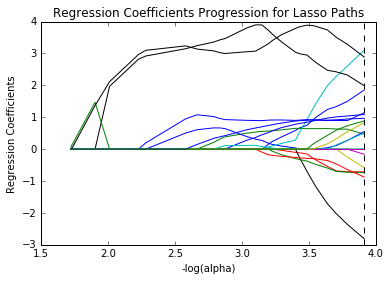

In [134]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

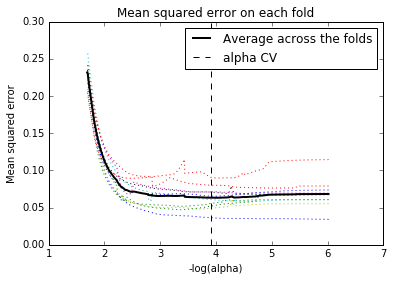

In [135]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [136]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
0.0566758278413
test data MSE
0.0593187926921


In [137]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.754547303331
test data R-square
0.752349969002
